# Predicting Social Media Ad Clicks

In recent years, internet marketing has supplanted traditional marketing tactics. Businesses like to use websites and social media platforms to advertise their goods. Finding the correct audience to target in online marketing is still difficult. It can be expensive to spend millions on advertising to an audience that is unlikely to purchase your items. Here we develop a machine learning algorithm that predicts if a particular user will click on an advertisement or not, helping us to analyse the purchase by means of advertisements.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Importing the Dataset

The dataset used in developing this algorithm is downloaded from here: https://www.kaggle.com/datasets/shrikantuppin/clicked-on-add

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.shape

(1000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


There are no missing values and all variables are complete. The data consists of 10 variables: 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country', Timestamp' and 'Clicked on Ad'. The main variable we would be looking into is 'Clicked on Add', and it has two outcomes: 0 and 1 where A user clicking the advertisement is represented by a value of 1, and a user not clicking the advertisement is represented by a value of 0.

In [6]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


Here, we observe that the smallest Area Income is \\$13,996.5 and the highest is $79,484.8 . Also from this one can infer that a user spends 32 to 91 minutes of time in one session on this platform. The average age of a user is 36 years with a range from young 19 years old to 61 years old person concluding that the platform targets adult users. The site is being visited by both men and women almost equally.

<AxesSubplot:xlabel='Age', ylabel='Density'>

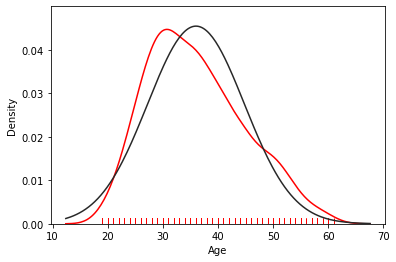

In [7]:
from scipy.stats import norm
sns.distplot(df['Age'], hist = False, color = 'red', rug = True, fit = norm)

From this plot, we can conclude that the 'Age' variable has a normal distribution of data.

<AxesSubplot:>

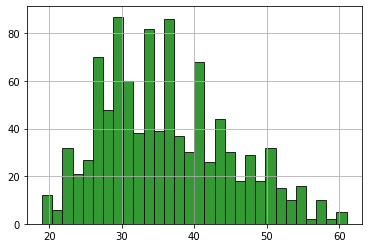

In [8]:
df['Age'].hist(bins=30, color = "green", edgecolor='black', alpha=0.8, lw=1)

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

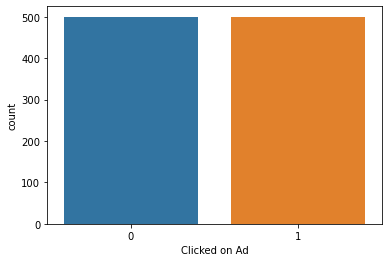

In [9]:
sns.countplot(data = df, x = 'Clicked on Ad')

<AxesSubplot:xlabel='Age', ylabel='Daily Time Spent on Site'>

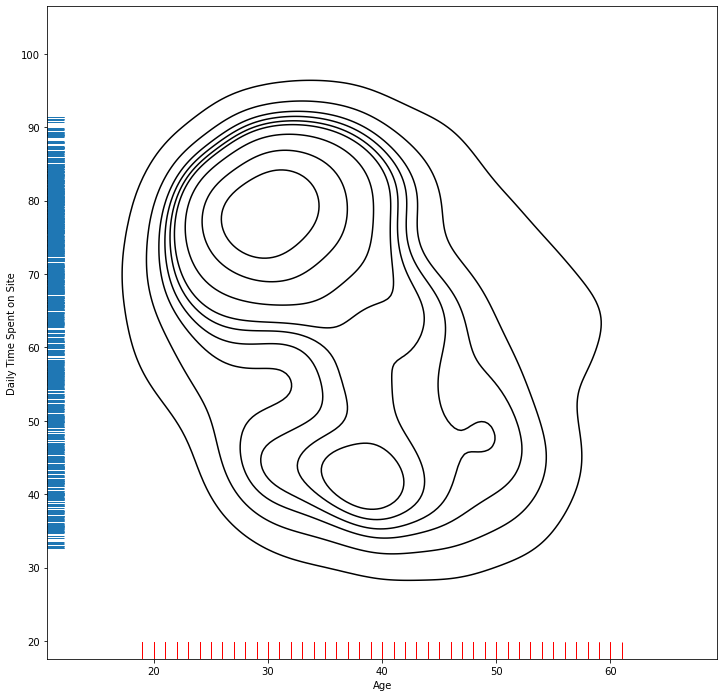

In [10]:
fig, ax = plt.subplots(figsize = (12, 12))

sns.kdeplot(df.Age, df['Daily Time Spent on Site'], color = 'black', ax = ax)
sns.rugplot(df.Age, color = 'red', ax = ax)
sns.rugplot(df['Daily Time Spent on Site'], vertical = True, ax = ax)

The younger age users spend more time on the site and this ideates that the major target audience for the marketing campaign may be users between the ages of 20 and 40. This is the best place for advertising if we have a product aimed at middle-aged consumers. On the other hand, using this site to advertise a product made for consumers over 60 would be a mistake.

<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Daily Internet Usage'>

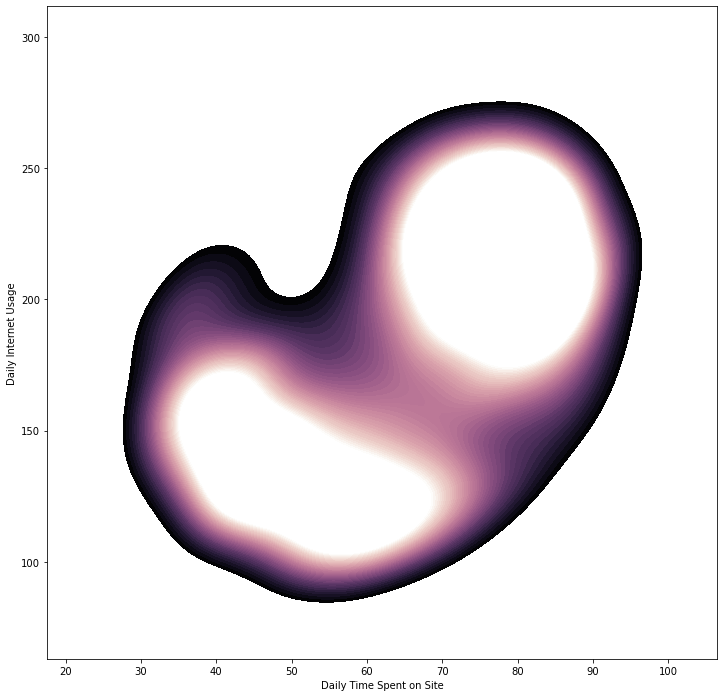

In [11]:
fig, ax = plt.subplots(figsize = (12, 12))

cmap = sns.cubehelix_palette(as_cmap = True, start = 0, dark = 0, light = 3, reverse = True)
sns.kdeplot(df['Daily Time Spent on Site'], df['Daily Internet Usage'], cmap = cmap, n_levels = 100, shade = True)

Here we can see the interdependency of 'Daily Time Spent on Site' and 'Daily Internet Usage'. It is evident that individuals who spend more time online also spend more time on the website.

array([[<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Daily Time Spent on Site'>,
        <AxesSubplot:xlabel='Age', ylabel='Daily Time Spent on Site'>,
        <AxesSubplot:xlabel='Area Income', ylabel='Daily Time Spent on Site'>,
        <AxesSubplot:xlabel='Daily Internet Usage', ylabel='Daily Time Spent on Site'>],
       [<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Age'>,
        <AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Area Income', ylabel='Age'>,
        <AxesSubplot:xlabel='Daily Internet Usage', ylabel='Age'>],
       [<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Area Income'>,
        <AxesSubplot:xlabel='Age', ylabel='Area Income'>,
        <AxesSubplot:xlabel='Area Income', ylabel='Area Income'>,
        <AxesSubplot:xlabel='Daily Internet Usage', ylabel='Area Income'>],
       [<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Daily Internet Usage'>,
        <AxesSubplot:xlabel='Age', ylabel='Daily Intern

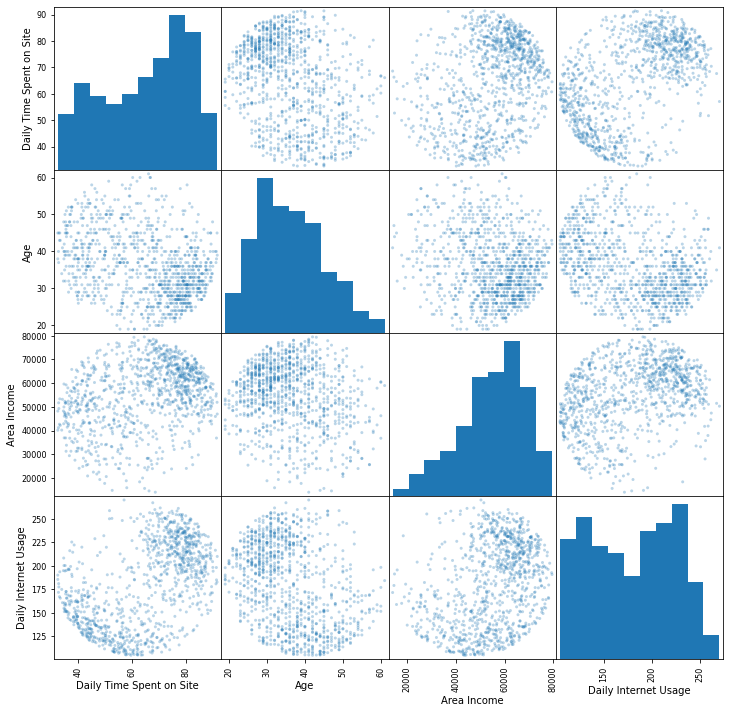

In [12]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']], alpha = 0.3, figsize = (12, 12))

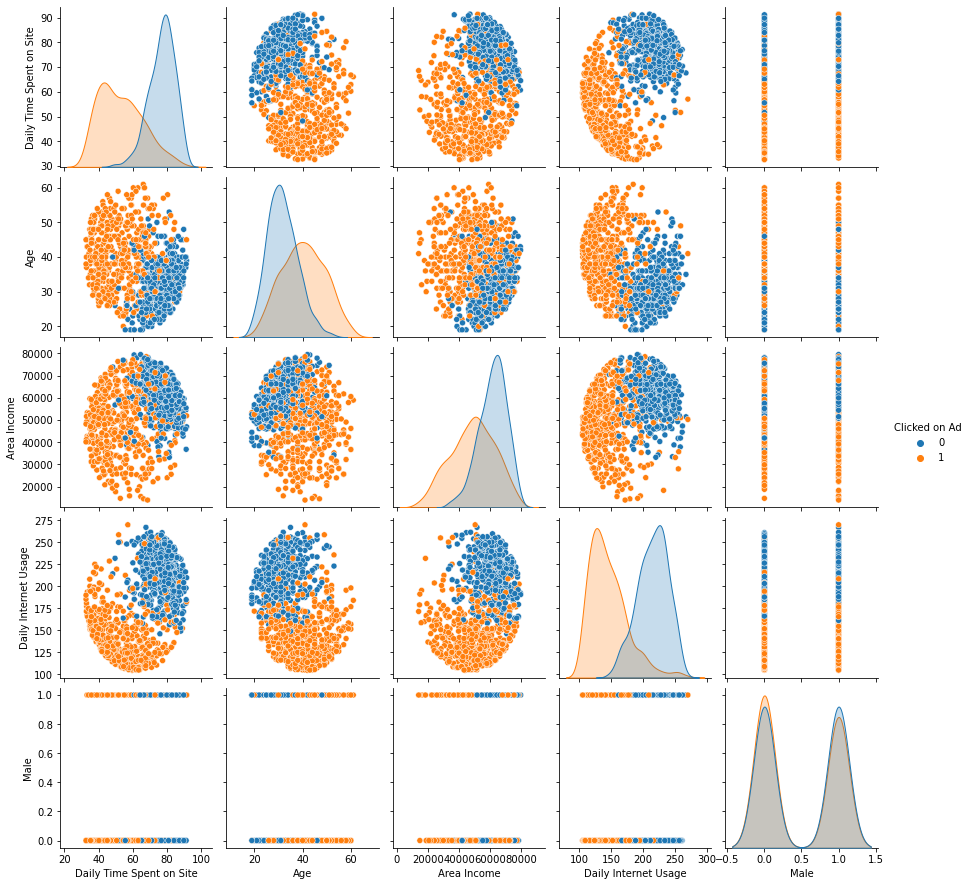

In [13]:
sns.pairplot(df, hue = 'Clicked on Ad')

Here, we can easily visualize how 'Click on Ad' varies and depends on factors like 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage' and 'Male'.

### Data Preprocessing

In [14]:
object_variables = ['Ad Topic Line', 'City', 'Country']
df[object_variables].describe()

,Ad Topic Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,Upgradable even-keeled challenge,Lisamouth,France
freq,1,3,9


'Ad Topic Line', 'City', and 'Country' variables are categorical columns. 'Ad Topic Line' column values are all unique, and the 'City' column has 969 out of 1000 unique values. These two categorical columns contain an excessive amount of unique items, making predictions without a data pattern is generally difficult. Hence, they will be omitted from further analysis.

In [15]:
pd.crosstab(index = df['Country'], columns = 'count').sort_values(['count'], ascending = False).head(25)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


Since our dataset includes 237 distinct, unique countries, and no one country is overly dominant (9 is the max). A machine learning model won't be able to quickly form useful correlations with a lot of unique elements. Hence, this variable will also be excluded.

In [16]:
df = df.drop(['Ad Topic Line', 'City', 'Country'], axis = 1)

In [17]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0


The 'Timestamp' indicates the precise time a person clicked on the advertisement. We will add four more categories to this one: month, day of the month, weekday, and hour. By doing this, we will be able to add additional variables to an ML model, which it may then use to look for potential dependencies and correlations. The 'Day of the week' variable contains values from 0 to 6 representing Monday to Sunday.

In [18]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Month'] = df['Timestamp'].dt.month
df['Day of the month'] = df['Timestamp'].dt.day
df['Day of the week'] = df['Timestamp'].dt.dayofweek
df['Hour'] = df['Timestamp'].dt.hour

df = df.drop(['Timestamp'], axis = 1)

df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day of the month,Day of the week,Hour
0,68.95,35,61833.90,256.09,0,0,3,27,6,0
1,80.23,31,68441.85,193.77,1,0,4,4,0,1
2,69.47,26,59785.94,236.50,0,0,3,13,6,20
3,74.15,29,54806.18,245.89,1,0,1,10,6,2
4,68.37,35,73889.99,225.58,0,0,6,3,4,3


In [19]:
temp_df = df.drop(['Month', 'Day of the month', 'Hour', 'Area Income', 'Daily Internet Usage'], axis = 1)

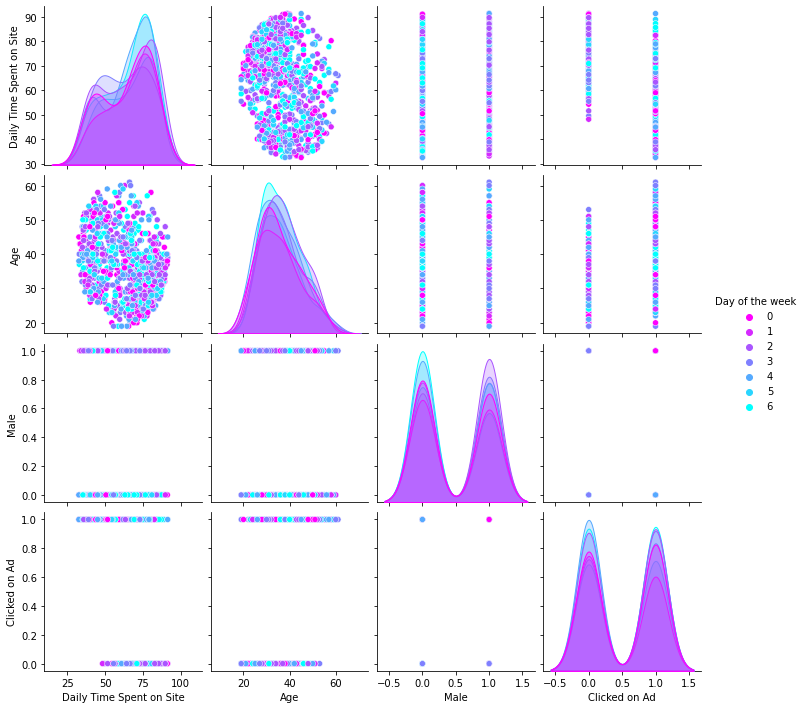

In [20]:
sns.pairplot(temp_df, hue = 'Day of the week', palette = 'cool_r')

Here, we can easily visualize how 'Day of the week' (Monday to Sunday) varies and depends on 'Daily Time Spent on Site', 'Age', 'Male', ' 'Clicked on Ad'.

In [21]:
new_df = df.drop(['Clicked on Ad'], axis = 1)
y = df['Clicked on Ad']

In [22]:
new_df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Month,Day of the month,Day of the week,Hour
0,68.95,35,61833.90,256.09,0,3,27,6,0
1,80.23,31,68441.85,193.77,1,4,4,0,1
2,69.47,26,59785.94,236.50,0,3,13,6,20
3,74.15,29,54806.18,245.89,1,1,10,6,2
4,68.37,35,73889.99,225.58,0,6,3,4,3


### Training and Testing Data

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(new_df, y, test_size = 0.3, random_state = 10)

In [24]:
len(X_train)

700

In [25]:
len(X_test)

300

## Building the Model

Here we would be developing 6 different ML models:

1. Logistic Regression
2. Decision Tree
3. Random Forest
4. K - Nearest Neighbors
5. Support Vector Machine
6. Naive Bayes.

Further, based on the accuracy scores of all these models, the model with the best score would be chosen as a final algorithm for using it in further prediction process to implement it in real - life applications.

## 1. Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [27]:
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)

LogisticRegression()

In [28]:
LR_predictions = model_1.predict(X_test)

In [29]:
accuracy_score(LR_predictions, y_test)

0.8933333333333333

In [30]:
cm1 = confusion_matrix(y_test, LR_predictions)
cm1

array([[136,  10],
       [ 22, 132]], dtype=int64)

In [31]:
print(classification_report(y_test, LR_predictions))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       146
           1       0.93      0.86      0.89       154

    accuracy                           0.89       300
   macro avg       0.90      0.89      0.89       300
weighted avg       0.90      0.89      0.89       300



## 2. Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
DT_predictions = model_2.predict(X_test)

In [34]:
accuracy_score(DT_predictions, y_test)

0.9466666666666667

In [35]:
cm2 = confusion_matrix(y_test, DT_predictions)
cm2

array([[138,   8],
       [  8, 146]], dtype=int64)

In [36]:
print(classification_report(y_test, DT_predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       146
           1       0.95      0.95      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



## 3. Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
model_3 = RandomForestClassifier(n_estimators = 20)
model_3.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [38]:
RF_predictions = model_3.predict(X_test)

In [39]:
accuracy_score(RF_predictions, y_test)

0.96

In [40]:
cm3 = confusion_matrix(y_test, RF_predictions)
cm3

array([[141,   5],
       [  7, 147]], dtype=int64)

In [41]:
print(classification_report(y_test, RF_predictions))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       146
           1       0.97      0.95      0.96       154

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



## 4. K - Nearest Neighbors

In [42]:
from sklearn.neighbors import KNeighborsClassifier
model_4 = KNeighborsClassifier(n_neighbors = 10)
model_4.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

In [43]:
KN_predictions = model_4.predict(X_test)

In [44]:
accuracy_score(KN_predictions, y_test)

0.7133333333333334

In [45]:
cm4 = confusion_matrix(y_test, KN_predictions)
cm4

array([[116,  30],
       [ 56,  98]], dtype=int64)

In [46]:
print(classification_report(y_test, KN_predictions))

              precision    recall  f1-score   support

           0       0.67      0.79      0.73       146
           1       0.77      0.64      0.70       154

    accuracy                           0.71       300
   macro avg       0.72      0.72      0.71       300
weighted avg       0.72      0.71      0.71       300



## 5. Support Vector Machine

In [47]:
from sklearn.svm import SVC
model_5 = SVC(C = 20, kernel = 'linear')
model_5.fit(X_train, y_train)

SVC(C=20, kernel='linear')

In [48]:
SV_predictions = model_5.predict(X_test)

In [49]:
accuracy_score(SV_predictions, y_test)

0.97

In [50]:
cm5 = confusion_matrix(y_test, SV_predictions)
cm5

array([[141,   5],
       [  4, 150]], dtype=int64)

In [51]:
print(classification_report(y_test, SV_predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       146
           1       0.97      0.97      0.97       154

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



## 6. Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
model_6 = GaussianNB()
model_6.fit(X_train, y_train)

GaussianNB()

In [53]:
NB_predictions = model_6.predict(X_test)

In [54]:
accuracy_score(NB_predictions, y_test)

0.9533333333333334

In [55]:
cm6 = confusion_matrix(y_test, NB_predictions)
cm6

array([[138,   8],
       [  6, 148]], dtype=int64)

In [56]:
print(classification_report(y_test, NB_predictions))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       146
           1       0.95      0.96      0.95       154

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



### Conclusion

In [57]:
predicts = [accuracy_score(LR_predictions, y_test), accuracy_score(DT_predictions, y_test),
            accuracy_score(RF_predictions, y_test), accuracy_score(KN_predictions, y_test), 
            accuracy_score(SV_predictions, y_test), accuracy_score(NB_predictions, y_test)]

final_pred = pd.DataFrame(predicts, columns = ['Accuracy of Models'], index = 
                          ['Logistic Regression',
                           'Decision Tree',
                           'Random Forest',
                           'K Nearest Neighbors',
                           'Support Vector Machine',
                           'Naive Bayes'])

In [58]:
final_pred

,Accuracy of Models
Logistic Regression,0.893333
Decision Tree,0.946667
Random Forest,0.960000
K Nearest Neighbors,0.713333
Support Vector Machine,0.970000
Naive Bayes,0.953333


We can conclude that the Support the Support Vector Machine model showed better performances compared to other models followed by Naive Bayes, Random Forest, Decision Tree and Logistic Regression models. Support Vector Classifier model gave us an accuracy of about 97 % which is a pretty good score. The SVM model showed a better performance than other models, but definitely other models like Naive Bayes, Random Forest, Decision Tree and Logistic Regression have shown that they could also be very successful in solving such classsification problems.

## Finding the best model using GridSearchCV

In [59]:
model_params = {
    'logistic_regression': {
        'model': LogisticRegression(solver = 'liblinear', multi_class = 'auto'),
        'params': {
            'C': [1, 5, 10]
        }
    },

    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy']
        }
    },

    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10]
        }
    },

    'k_nearest_neighbors': {
        'model': KNeighborsClassifier(),
        'params': {}
    },

    'svm': {
        'model': SVC(gamma = 'auto'),
        'params': {
            'C': [1, 10, 20],
            'kernel': ['rbf', 'linear']
        }
    },

    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    }
}

In [60]:
from sklearn.model_selection import GridSearchCV
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score=False)
    clf.fit(new_df, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,logistic_regression,0.912,{'C': 1}
1,decision_tree,0.945,{'criterion': 'entropy'}
2,random_forest,0.956,{'n_estimators': 10}
3,k_nearest_neighbors,0.717,{}
4,svm,0.967,"{'C': 20, 'kernel': 'linear'}"
5,naive_bayes_gaussian,0.966,{}


Based on above results we can say that SVM with C=20 and kernel='linear', SVM{'C': 20, 'kernel': 'linear'} is the best model for solving this problem and it gives the best performance with a score of 96.7 % . So model_5 is the final ML model to solve this problem.

In [61]:
# Equating SVM Model (5th model) to a final model to use it in further process

model = model_5

### Testing the model

Predict if the Ad is clicked by a 31 years old male person with an area income of 50000 who spends 70 minutes of time on the site daily with 200 internet usage daily on 4th July (Monday) at 9 pm.

In [62]:
model.predict([[70, 31, 50000, 200, 1, 7, 4, 0, 21]])

array([1], dtype=int64)

Predict if the Ad is clicked by a 55 years old female person with an area income of 30000 who spends 50 minutes of time on the site daily with 150 internet usage daily on 4th July (Monday) at 8 pm.

In [63]:
model.predict([[50, 55, 30000, 150, 0, 7, 4, 0, 20]])

array([1], dtype=int64)

Predict if the Ad is clicked by a 36 years old female person with an area income of 74000 who spends 69 minutes of time on the site daily with 230 internet usage daily on 4th July (Friday) at 3 am.

In [64]:
model.predict([[69, 36, 74000, 230, 0, 7, 4, 4, 3]])

array([0], dtype=int64)

### Export the tested model to a pickle file

In [65]:
import pickle
with open('social_media_ads_model.pickle', 'wb') as f:
    pickle.dump(model, f)